## **DBSCAN** : density-based clustering. appication with noise

### **장점**
* 클러스터 갯수를 미리 정할 필요가 없다
* 변합군집 또는 k-평균보다 다소 느리다. 하지만 비교적 큰 데이터 셋에 적용 가능

### **DBSCAN의 point**
* core point : 핵심 샘플
* border point : 경계 포인트 (핵심 포인트에서 eps 거리 안에 있는 포인트)
* noise point : 잡음 포인트

In [4]:
pip install mglearn

     |████████████████████████████████| 542kB 5.1MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.8-py2.py3-none-any.whl size=582647 sha256=3e400d5ea4755819ba8432f2c4b518e3fd85cd0c594e1b02f81c2f4544d69a5d
  Stored in directory: /root/.cache/pip/wheels/47/b8/58/ce0c4be41f4efbfb8773eb72782164dbb758685d12ef2732f5
Successfully built mglearn


In [5]:
import mglearn

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


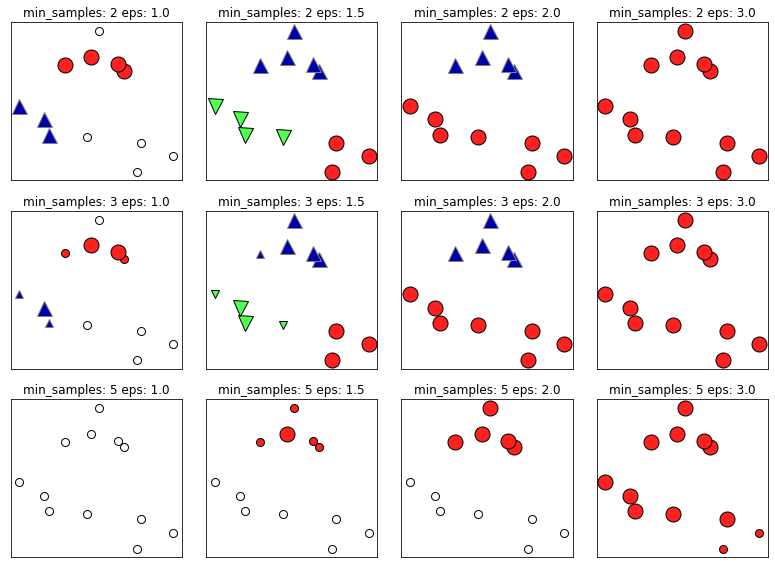

In [6]:
mglearn.plots.plot_dbscan()

* core point(핵심 포인트) : 밀집 지역에 있는 포인트


**알고리즘 동작**
01. 알고리즘 시작 시에 무작위로 포인트를 선택
02. 포인트에서 eps 거리 안의 모든 포인트를 찾음
03. 만약 eps 거리 안의 포인트 수가 min_samples보다 적다면 그 포인트는 
  * Border point : 최소포인트보다 적음
  * Noise point : 포인트가 없음

* 핵심샘플이 core point를 거쳐가면서 클러스터가 커짐

In [0]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

**01. 데이터 전처리** : StandardScaler

In [11]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
X.shape

(200, 2)

In [0]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

**02. DBSCAN**

In [0]:
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)

**03. 그래프 확인**
* X : make_moons 첫번째 열
* Y : make_moons 두번째 열
* c (컬러) : clusters
* 레이블 : x(feature 0), y(feature 1)

In [0]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'feature 1')

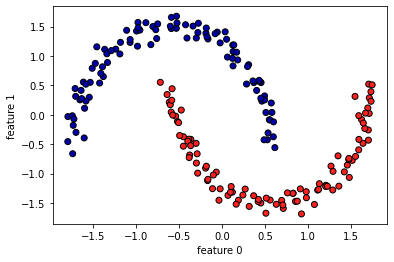

In [17]:
X = X_scaled[:,0]
Y = X_scaled[:,1]
plt.scatter(X, Y, cmap=mglearn.cm2, c=clusters, edgecolors='black')
plt.xlabel('feature 0')
plt.ylabel('feature 1')